In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("Car details.csv")
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
cars.shape

(8128, 13)

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
cars.dropna(inplace = True)

In [7]:
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## Veri Temizleme

#### TORK DEĞERLERİNİ TEMİZLEME

In [8]:
torque_rpm = []
def RPMalma(x):
    for item in x:
        res = item.replace(".", "")
        res = res.replace(",", "")
        temp = [int(i) for i in re.findall(r"\d+", res)]
        torque_rpm.append(max(temp))

In [9]:
torque_list = cars["torque"]
torque_list[0:5]

0              190Nm@ 2000rpm
1         250Nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

In [10]:
RPMalma(torque_list)
torque_rpm[0:5]

[2000, 2500, 2700, 2750, 4500]

In [11]:
cars["torque_rpm"] = torque_rpm
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500


#### GÜÇ DEĞERLERİNİ TEMİZLEME

In [12]:
max_guc = []
def GUCalma(x):
    for i in x:
        i = i.split()[0]
        max_guc.append(float(i))

In [13]:
power_list = cars["max_power"]
power_list[0:5]

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [14]:
GUCalma(power_list)
max_guc[0:5]

[74.0, 103.52, 78.0, 90.0, 88.2]

In [15]:
cars["max_guc"] = max_guc
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20


#### HACİM DEĞERLERİNİ TEMİZLEME

In [16]:
motor_hacmi = []
def HACIMalma(x):
    for i in x:
        i = i.split()[0]
        motor_hacmi.append(int(i))

In [17]:
engine_list = cars["engine"]
engine_list[0:5]

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [18]:
HACIMalma(engine_list)
motor_hacmi[0:5]

[1248, 1498, 1497, 1396, 1298]

In [19]:
cars["motor_hacmi"] = motor_hacmi
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298


#### VİTES DEĞERLERİNİ TEMİZLEME

In [20]:
cars.groupby("transmission").count()

,name,year,selling_price,km_driven,fuel,seller_type,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi
transmission,,,,,,,,,,,,,,,
Automatic,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041,1041
Manual,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865,6865


In [21]:
vites = []
def VITESalma(x):
    for i in x:
        if i == "Manual":
            vites.append(0)
        elif i == "Automatic":
            vites.append(1)

In [22]:
transmission_list = cars["transmission"]
transmission_list[0:5]

0    Manual
1    Manual
2    Manual
3    Manual
4    Manual
Name: transmission, dtype: object

In [23]:
VITESalma(transmission_list)
vites[0:5]

[0, 0, 0, 0, 0]

In [24]:
cars["vites_turu"] = vites
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298,0


#### SATICI TİPİ DEĞERLERİNİ TEMİZLEME

In [25]:
cars.groupby("seller_type").count()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu
seller_type,,,,,,,,,,,,,,,,
Dealer,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107
Individual,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563,6563
Trustmark Dealer,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236,236


In [26]:
satici = []
def SATtipi(x):
    for i in x:
        if i == "Dealer":
            satici.append(0)
        elif i == "Individual":
            satici.append(1)
        elif i == "Trustmark Dealer":
            satici.append(-1)

In [27]:
satici_tipi = cars["seller_type"]
satici_tipi[0:5]

0    Individual
1    Individual
2    Individual
3    Individual
4    Individual
Name: seller_type, dtype: object

In [28]:
SATtipi(satici_tipi)
satici[0:5]

[1, 1, 1, 1, 1]

In [29]:
cars["satici_tipi"] = satici
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298,0,1


#### YAKIT DEĞERLERİNİ TEMİZLEME

In [30]:
cars.groupby("fuel").count()

,name,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi
fuel,,,,,,,,,,,,,,,,,
CNG,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Diesel,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299,4299
LPG,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
Petrol,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520,3520


In [31]:
yakit = []
def YAKITtipi(x):
    for i in x:
        if i == "Petrol":
            yakit.append(0)
        elif i == "Diesel":
            yakit.append(1)
        else:
            yakit.append(-1)

In [32]:
fuel_list = cars["fuel"]
fuel_list[0:5]

0    Diesel
1    Diesel
2    Petrol
3    Diesel
4    Petrol
Name: fuel, dtype: object

In [33]:
YAKITtipi(fuel_list)
yakit[0:5]

[1, 1, 0, 1, 0]

In [34]:
cars["yakit_tipi"] = yakit
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi,yakit_tipi
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,74.00,1248,0,1,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,103.52,1498,0,1,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700,78.00,1497,0,1,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750,90.00,1396,0,1,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500,88.20,1298,0,1,0


#### FAZLA SÜTUNLARI ÇIKARMA

name===> İsmi makine öğrenmesinde kullanamıyouz

owner===> Önemli olmadığını düşündüğüm için attım

mileage===> km_driven değeri de aynı amaçla kullanıldığı için attım(sadece birim farklı)

In [35]:
cars.drop(["name","fuel", "seller_type", "transmission", "owner", "mileage", "engine", "max_power", "torque"], axis = 1, inplace = True)
cars.head(5)

,year,selling_price,km_driven,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi,yakit_tipi
0,2014,450000,145500,5.0,2000,74.00,1248,0,1,1
1,2014,370000,120000,5.0,2500,103.52,1498,0,1,1
2,2006,158000,140000,5.0,2700,78.00,1497,0,1,0
3,2010,225000,127000,5.0,2750,90.00,1396,0,1,1
4,2007,130000,120000,5.0,4500,88.20,1298,0,1,0


In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   seats          7906 non-null   float64
 4   torque_rpm     7906 non-null   int64  
 5   max_guc        7906 non-null   float64
 6   motor_hacmi    7906 non-null   int64  
 7   vites_turu     7906 non-null   int64  
 8   satici_tipi    7906 non-null   int64  
 9   yakit_tipi     7906 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 679.4 KB


## Temizlenmiş Veriyi İnceleme

In [37]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.0,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.0,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.0,2360457.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.0,14.0
torque_rpm,7906.0,3474.631419,2579.612132,400.0,2500.00,3000.0,4000.0,43639.0
max_guc,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.0,400.0
motor_hacmi,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.0,3604.0
vites_turu,7906.0,0.131672,0.338155,0.0,0.00,0.0,0.0,1.0
satici_tipi,7906.0,0.800278,0.468575,-1.0,1.00,1.0,1.0,1.0
yakit_tipi,7906.0,0.532760,0.520547,-1.0,0.00,1.0,1.0,1.0


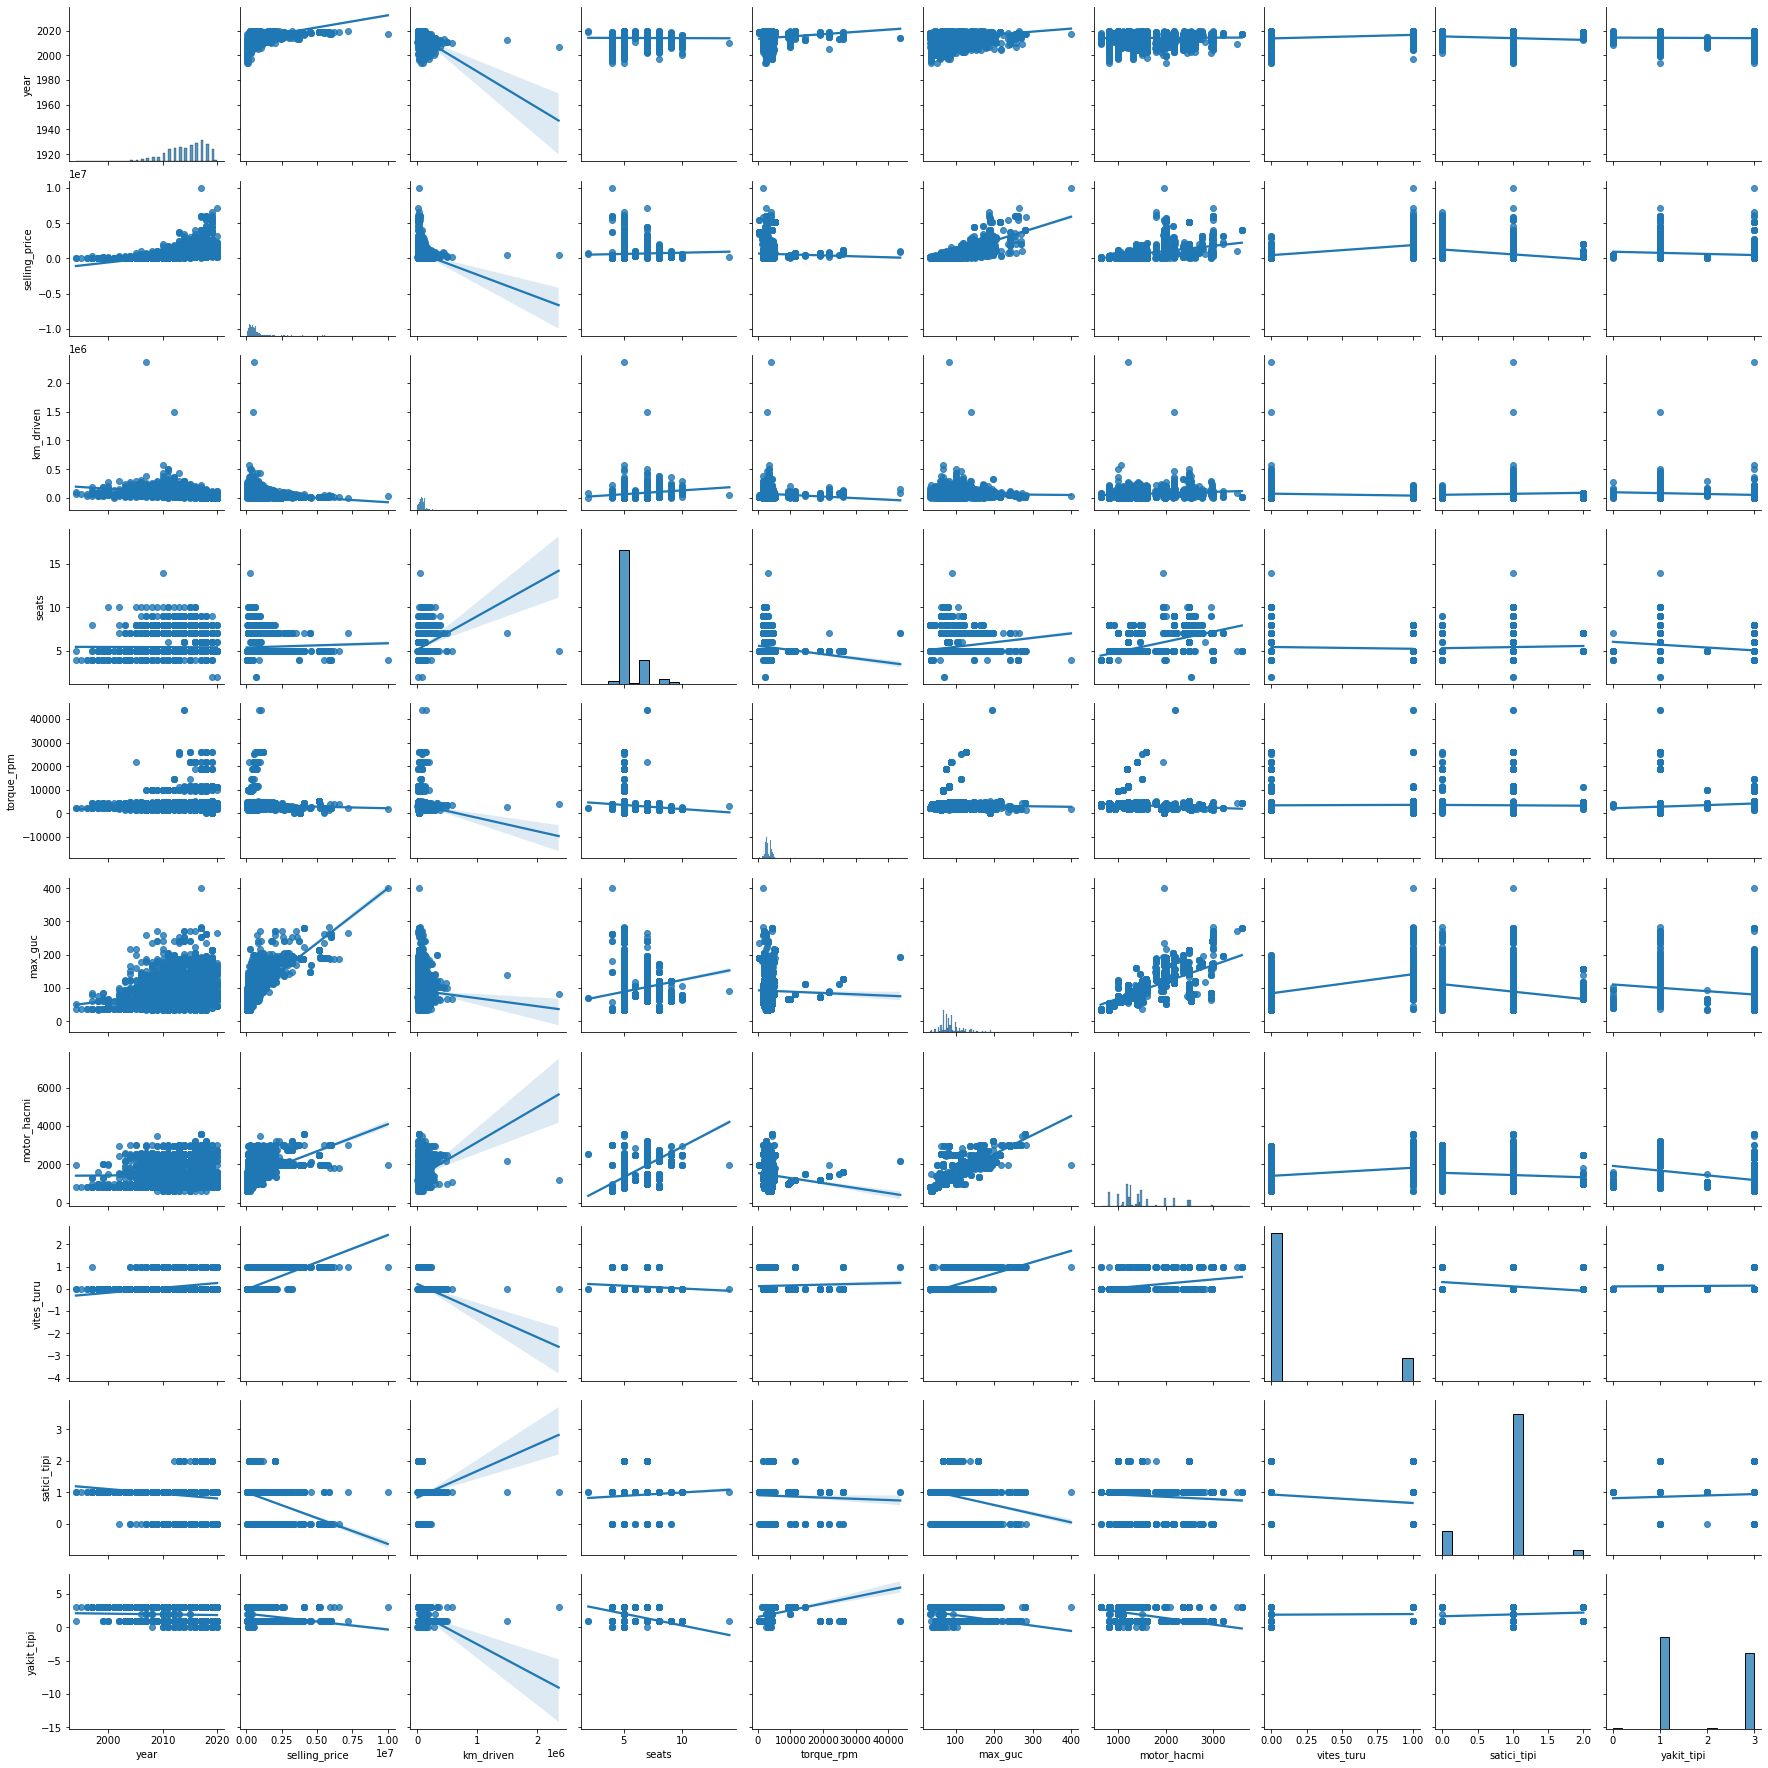

In [38]:
sns.pairplot(cars, kind = "reg")

<AxesSubplot:>

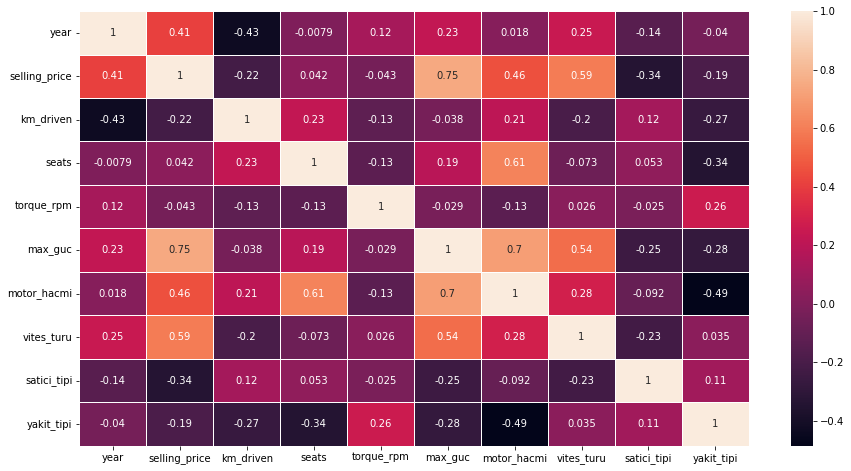

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(cars.corr(), linewidths = 0.5, annot = True)

Yukarıda görülüyor ki km_driven değişkeninin içinde 2 tane aykırı gözlem var.Bu değişken algoritmayı yanıltabilir, bu yüzden son iki değeri atıyoruz

In [38]:
cars.sort_values("km_driven").tail(5)

,year,selling_price,km_driven,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi,yakit_tipi
6673,2011,350000,500000,7.0,3400,100.57,2494,0,1,1
3641,2011,229999,500000,5.0,3500,67.10,998,0,1,0
3508,2010,194000,577414,5.0,3500,67.00,1061,0,1,0
1810,2012,500000,1500000,7.0,2800,140.00,2179,0,1,1
3486,2007,550000,2360457,5.0,4000,81.83,1197,0,1,0


In [39]:
cars.drop([1810,3486], inplace = True)
cars.sort_values("km_driven").tail(5)

,year,selling_price,km_driven,seats,torque_rpm,max_guc,motor_hacmi,vites_turu,satici_tipi,yakit_tipi
5189,2013,750000,440000,7.0,3400,100.60,2494,0,1,1
5106,2011,400000,475000,5.0,2775,115.00,2179,0,1,1
6673,2011,350000,500000,7.0,3400,100.57,2494,0,1,1
3641,2011,229999,500000,5.0,3500,67.10,998,0,1,0
3508,2010,194000,577414,5.0,3500,67.00,1061,0,1,0


In [40]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7904.0,2013.985071,3.863321,1994.0,2012.00,2015.0,2017.0,2020.0
selling_price,7904.0,649845.303264,813683.167529,29999.0,270000.00,450000.0,690000.0,10000000.0
km_driven,7904.0,68717.748861,47985.648422,1.0,34875.00,60000.0,95050.0,577414.0
seats,7904.0,5.416245,0.959153,2.0,5.00,5.0,5.0,14.0
torque_rpm,7904.0,3474.650304,2579.920591,400.0,2500.00,3000.0,4000.0,43639.0
max_guc,7904.0,91.582483,35.747422,32.8,68.05,82.0,102.0,400.0
motor_hacmi,7904.0,1458.650810,503.883072,624.0,1197.00,1248.0,1582.0,3604.0
vites_turu,7904.0,0.131705,0.338192,0.0,0.00,0.0,0.0,1.0
satici_tipi,7904.0,0.800228,0.468623,-1.0,1.00,1.0,1.0,1.0
yakit_tipi,7904.0,0.532768,0.520552,-1.0,0.00,1.0,1.0,1.0


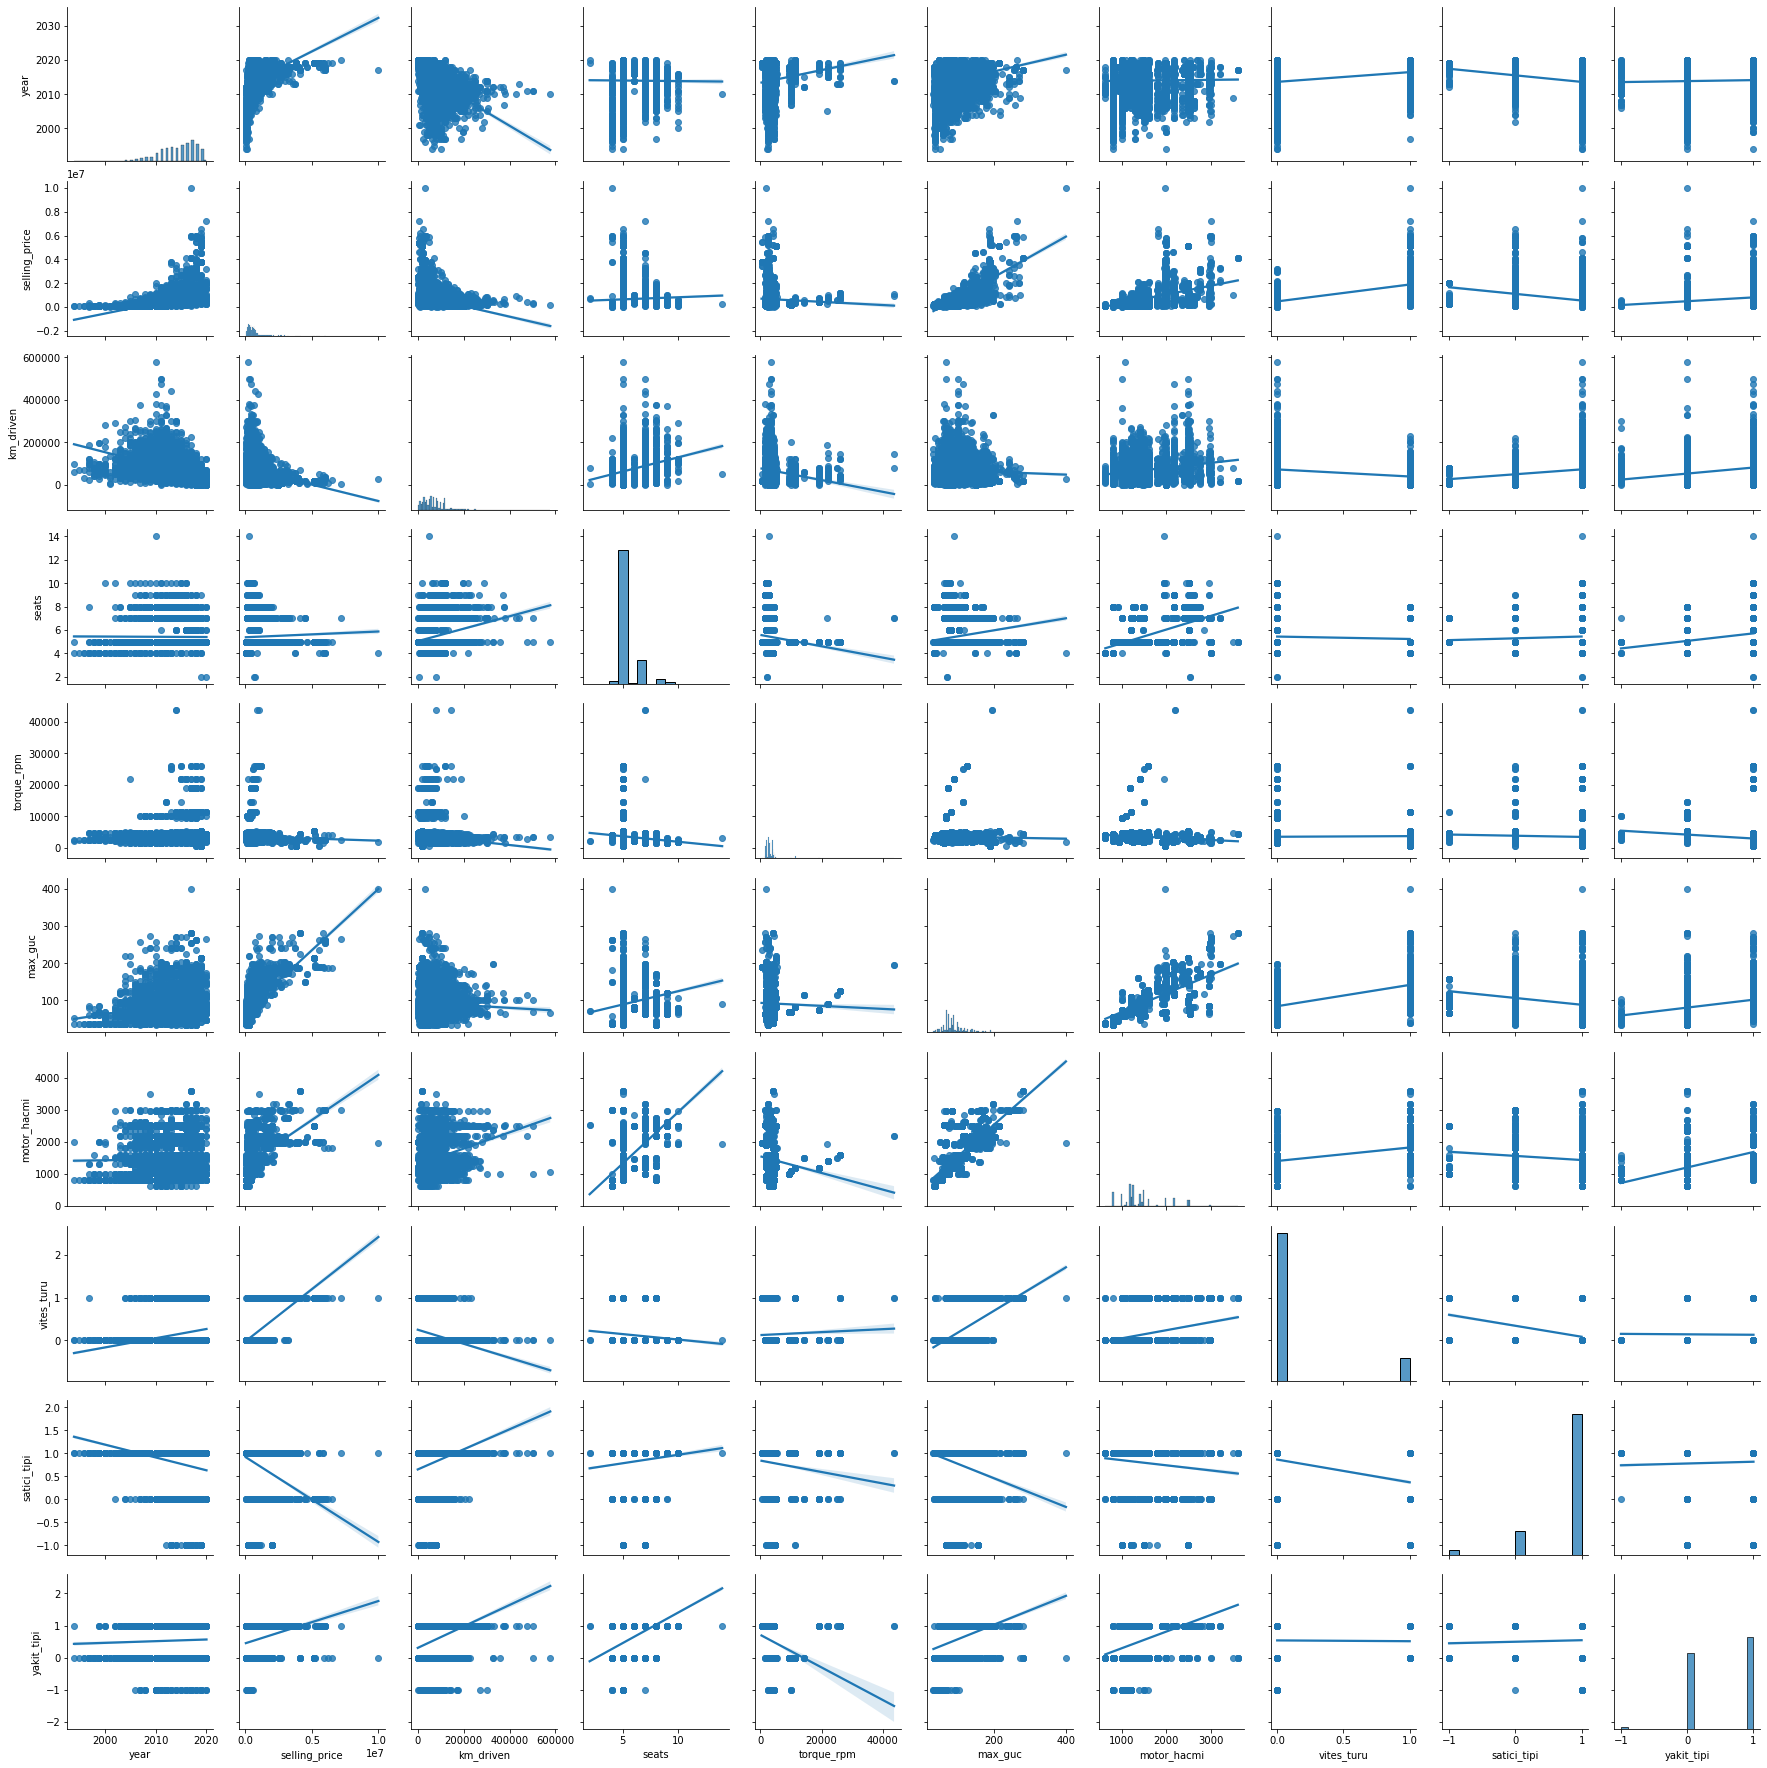

In [42]:
sns.pairplot(cars, kind = "reg")

<AxesSubplot:>

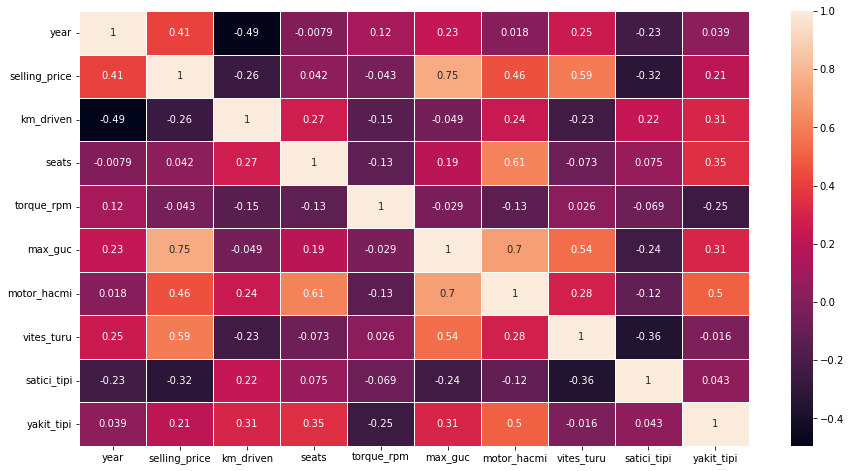

In [41]:
plt.figure(figsize = (15,8))
sns.heatmap(cars.corr(), linewidths = 0.5, annot = True)

Tork değerlerinde de bir sorun var.Max değer olan 43639 aşrı yüksek. %75lik değerle bulunun 4000 ise normal. Üstteki ~250-300 gözlemi silmek veya düzenlemek gerekebilir ancak bu konuyu bilmediğim için karışmadım

## Model Kurma

In [44]:
X = cars.drop(["selling_price"], axis = 1)
y = cars["selling_price"]

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 96)

### RandomForest Regresyon

In [46]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 96, n_jobs = -1)

In [47]:
rf_model = rf.fit(X_train, y_train)

In [49]:
rf_model.score(X_train, y_train)

0.9952673915468744

In [53]:
rf_model.score(X_test, y_test)

0.962207608909877

### Linear Regresyon

In [56]:
lm = LinearRegression(copy_X = True, fit_intercept = True, normalize = False)
lm_model = lm.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [57]:
lm_model.score(X_train, y_train)

0.6769507265615498

In [58]:
lm_model.score(X_test, y_test)

0.6661105261564326

## Pickle

In [60]:
import pickle
saved_model = pickle.dump(rf_model, open("CarSelling.pickle", "wb"))